In [132]:
import os
import struct
import numpy as np
import random
import tensorflow as tf

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise ValueError, "dataset must be 'testing' or 'training'"

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
        
    return img,lbl

#     get_img = lambda idx: (lbl[idx], img[idx])

#     # Create an iterator which returns each image in turn
#     for i in xrange(len(lbl)):
#         yield get_img(i)

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

In [29]:
# Creates a graph.
with tf.device('/gpu:0'):
  a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
  b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
  c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))


InvalidArgumentError: Cannot assign a device to node 'MatMul_14': Could not satisfy explicit device specification '/device:GPU:0' because no devices matching that specification are registered in this process; available devices: /job:localhost/replica:0/task:0/cpu:0
	 [[Node: MatMul_14 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/device:GPU:0"](a_14, b_14)]]

Caused by op u'MatMul_14', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-a176f6aecf2f>", line 5, in <module>
    c = tf.matmul(a, b)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_ops.py", line 1801, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 1263, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Cannot assign a device to node 'MatMul_14': Could not satisfy explicit device specification '/device:GPU:0' because no devices matching that specification are registered in this process; available devices: /job:localhost/replica:0/task:0/cpu:0
	 [[Node: MatMul_14 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/device:GPU:0"](a_14, b_14)]]


In [133]:
train_dataset,train_labels = read(dataset = "training", path = ".")
test_dataset,test_labels = read(dataset = "testing", path = ".")

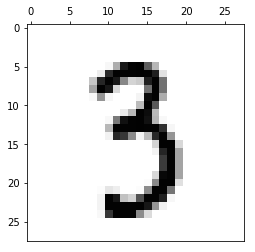

5

In [44]:
show(train_dataset[98])

[random.randint(14,50) for x in range(2)]
train_labels[0]

In [140]:
#choose a more apt argument for randint
def randCentre():
    image1_centre = [32,random.randint(14,23)]
    image2_centre = [32,random.randint(40,49)]
    return image1_centre,image2_centre

def randIndex():
    image1_index = random.randint(0,1000)
    image2_index = random.randint(0,1000)
    return image1_index,image2_index

In [141]:
def trainingSet1 (train_dataset,train_labels):
    train_dataset_2digit = np.zeros((1000,64,64))
    train_dataset_2digit_labels = np.zeros((1000))
    for count in range(1000):
        image1_index,image2_index = randIndex()
        image1_centre,image2_centre = randCentre()
        for i in range(28):
            for j in range(28):
                train_dataset_2digit[count][image1_centre[0] - 14 + i][image1_centre[1] - 14 + j] = (train_dataset[image1_index][i][j]-128)/128
                train_dataset_2digit[count][image2_centre[0] - 14 + i][image2_centre[1] - 14 + j] = (train_dataset[image2_index][i][j]-128)/128
        if(image1_centre[1]>image2_centre[1]): train_dataset_2digit_labels[count] = 10*train_labels[image2_index]+train_labels[image1_index]
        else: train_dataset_2digit_labels[count] = 10*train_labels[image1_index]+train_labels[image2_index]
    
    return train_dataset_2digit,train_dataset_2digit_labels    
    



In [138]:
x,y = trainingSet1(train_dataset,train_labels)

In [142]:
test_dataset1,test_labels1 = trainingSet1(test_dataset,test_labels)    

In [172]:
def merge(array1,array2):
    array = np.concatenate((array1, array2), axis=0)
    return array

In [173]:
def permute(array):
    return np.random.permutation(array)

In [143]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [144]:
train_dataset1 = x
train_labels1 = y
print(y)

[ 97.  38.  49. ...,  36.  51.   4.]


In [119]:
train_dataset1 = (train_dataset1 - 128)/128

In [145]:
image_size = 64
num_labels = 100
num_channels = 1 # grayscale

def reformat(dataset, labels):
  dataset = dataset.reshape(
    (-1, image_size, image_size, num_channels)).astype(np.float32)
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset1, train_labels1 = reformat(train_dataset1, train_labels1)
test_dataset1, test_labels1 = reformat(test_dataset1, test_labels1)
print('Training set', train_dataset1.shape, train_labels1.shape)
print('Test set', test_dataset1.shape, test_labels1.shape)

('Training set', (100000, 64, 64, 1), (100000, 100))
('Test set', (1000, 64, 64, 1), (1000, 100))


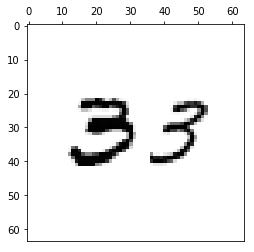

array([[[[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]]], dtype=float32)

In [129]:
show(x[3])
train_labels1[3]

In [165]:
batch_size = 128
patch_size = 5
depth = 64
num_hidden = 64

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_test_dataset = tf.constant(test_dataset1,dtype=tf.float32)
  
  # Variables.
  layer1_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, num_channels, depth], stddev=0.1))
  layer1_biases = tf.Variable(tf.zeros([depth]))
  layer2_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, depth, depth], stddev=0.1))
  layer2_biases = tf.Variable(tf.zeros([depth]))
  layer3_weights = tf.Variable(tf.truncated_normal(
      [image_size // 4 * image_size // 4 * depth, num_hidden], stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
  layer4_weights = tf.Variable(tf.truncated_normal(
      [num_hidden, num_labels], stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  global_step = tf.Variable(0)  
  
  # Model.
  def model(data):
    conv = tf.nn.conv2d(data, layer1_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer1_biases)
    conv = tf.nn.conv2d(hidden, layer2_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer2_biases)
    shape = hidden.get_shape().as_list()
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    return tf.matmul(hidden, layer4_weights) + layer4_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
    
  # Optimizer.
  learning_rate = tf.train.exponential_decay(0.05, global_step, 1000, 0.85, staircase=True)
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  test_prediction = tf.nn.softmax(model(tf_test_dataset))

In [167]:
num_steps = 3000

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels1.shape[0] - batch_size)
    batch_data = train_dataset1[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels1[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 50 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      #print('Validation accuracy: %.1f%%' % accuracy(
       # valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels1))

Initialized
Minibatch loss at step 0: 7.205978
Minibatch accuracy: 0.0%
Minibatch loss at step 50: 4.621195
Minibatch accuracy: 0.0%
Minibatch loss at step 100: 4.575899
Minibatch accuracy: 0.8%
Minibatch loss at step 150: 4.601332
Minibatch accuracy: 1.6%
Minibatch loss at step 200: 4.531965
Minibatch accuracy: 2.3%
Minibatch loss at step 250: 4.429788
Minibatch accuracy: 3.9%
Minibatch loss at step 300: 4.258839
Minibatch accuracy: 4.7%
Minibatch loss at step 350: 3.954561
Minibatch accuracy: 7.0%
Minibatch loss at step 400: 3.259746
Minibatch accuracy: 16.4%
Minibatch loss at step 450: 2.974470
Minibatch accuracy: 18.0%
Minibatch loss at step 500: 2.578224
Minibatch accuracy: 25.8%
Minibatch loss at step 550: 2.203219
Minibatch accuracy: 34.4%
Minibatch loss at step 600: 2.392950
Minibatch accuracy: 38.3%
Minibatch loss at step 650: 2.013759
Minibatch accuracy: 41.4%
Minibatch loss at step 700: 1.746876
Minibatch accuracy: 51.6%
Minibatch loss at step 750: 1.924506
Minibatch accurac

In [2]:
num_steps = 3000
for step in range(num_steps):
    x = (step * 128) % (100000 - 128)
    print(x)

0
128
256
384
512
640
768
896
1024
1152
1280
1408
1536
1664
1792
1920
2048
2176
2304
2432
2560
2688
2816
2944
3072
3200
3328
3456
3584
3712
3840
3968
4096
4224
4352
4480
4608
4736
4864
4992
5120
5248
5376
5504
5632
5760
5888
6016
6144
6272
6400
6528
6656
6784
6912
7040
7168
7296
7424
7552
7680
7808
7936
8064
8192
8320
8448
8576
8704
8832
8960
9088
9216
9344
9472
9600
9728
9856
9984
10112
10240
10368
10496
10624
10752
10880
11008
11136
11264
11392
11520
11648
11776
11904
12032
12160
12288
12416
12544
12672
12800
12928
13056
13184
13312
13440
13568
13696
13824
13952
14080
14208
14336
14464
14592
14720
14848
14976
15104
15232
15360
15488
15616
15744
15872
16000
16128
16256
16384
16512
16640
16768
16896
17024
17152
17280
17408
17536
17664
17792
17920
18048
18176
18304
18432
18560
18688
18816
18944
19072
19200
19328
19456
19584
19712
19840
19968
20096
20224
20352
20480
20608
20736
20864
20992
21120
21248
21376
21504
21632
21760
21888
22016
22144
22272
22400
22528
22656
22784
22912
23040
231

10656
10784
10912
11040
11168
11296
11424
11552
11680
11808
11936
12064
12192
12320
12448
12576
12704
12832
12960
13088
13216
13344
13472
13600
13728
13856
13984
14112
14240
14368
14496
14624
14752
14880
15008
15136
15264
15392
15520
15648
15776
15904
16032
16160
16288
16416
16544
16672
16800
16928
17056
17184
17312
17440
17568
17696
17824
17952
18080
18208
18336
18464
18592
18720
18848
18976
19104
19232
19360
19488
19616
19744
19872
20000
20128
20256
20384
20512
20640
20768
20896
21024
21152
21280
21408
21536
21664
21792
21920
22048
22176
22304
22432
22560
22688
22816
22944
23072
23200
23328
23456
23584
23712
23840
23968
24096
24224
24352
24480
24608
24736
24864
24992
25120
25248
25376
25504
25632
25760
25888
26016
26144
26272
26400
26528
26656
26784
26912
27040
27168
27296
27424
27552
27680
27808
27936
28064
28192
28320
28448
28576
28704
28832
28960
29088
29216
29344
29472
29600
29728
29856
29984
30112
30240
30368
30496
30624
30752
30880
31008
31136
31264
31392
31520
31648
31776
3190